## OPTI 528 - Assignment 2 - Jaren Ashcraft

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 - Shearing Interferometer
Derive an equation for the angle of the fringes as a function of shear plate angle ($\theta$), amplitude of defocus ($W_{020}$), shear length (S), and refractive index (n)

# Problem 2 - Wavefront Sensing
Background: The aberrations at a 6.5 m astronomical telescope are measured with a Shack-Hartmann wave-front sensor. The Fried length is 1.2 m at the wavelength of your science camera. Each spot is imaged onto a quad cell, where each pixel projects to 2 arcsec on sky. The beacon is a star of magnitude 12 and the background is very dark. The spot position on the WFS is measured using the centroid equation. 

## a) How many subapertures should you use for your SHWFS and how large should they be?

$$N_{subap} = (\frac{D = 6.5}{r_{0} = 1.2})^{2} ~= 30 $$

Each subaperture should be 1.2m in side length when imaged onto the primary.

## b) What is the fitting error from your WFS?

## c) A helicopter with a search light encroaches into your image, increasing the background magnitude to 15 per arcsec2. How are the centroid values changed?

## d)     d. What would you expect the approximate Strehl ratio to be with this increased background magnitude? (10)
Hint: How do centroid errors translate to errors in wave-front estimation?

# Problem 3 - Wavefront Fitting

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 31 11:31:50 2020

@author: Charlotte E. Guthery

"""
def kolphaseClass(s):
    #phase=kolphaseClass(s)
    # Returns a random Kolmogorov phase screen of dimension s x s computed 
    # from the FT of random complex numbers with appropriate amplitudes. 
    # Screens are computed on a grid of size 2s, with a s x s piece cut out. 
    # This helps overcome the problem with this techniqe of under-representing 
    # tilt. Tandom tilts are also explicity added to give a reasonable 
    # approximation of the overall Kolmogorav structure function on all scales.
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ph=np.zeros([s,s,2]) #initialize phase variable
    [x,y]=np.meshgrid(range(-s,s),range(-s,s))
    r=np.sqrt(np.multiply(x,x)+np.multiply(y,y)) #make a radial ordinate
    
    f1=np.random.randn(2*s,2*s) #make two sets of gaussian random numbers
    f2=np.random.randn(2*s,2*s)

    f=f1+1j*f2 #turn the two random numbers into a complex random number
    ps=np.power(r,-11/6) #Kolomogorov power spectrum amplitude
    ps[s][s]=0; #setting the centr of the power spectrum (DC term) to zero
    
    scale=15.2 #this number makes the tilts work out 

    xt=np.random.randn(2)*(scale/s) #random amplitudes for tip and tilt to 
    yt=np.random.randn(2)*(scale/s) #mitigate power spectral rolloff at low frequencies 

    #This has Kolmogorov phases in real and imaginary parts
    sc= np.fft.fft2(np.fft.fftshift(np.multiply(np.multiply(np.abs(f),ps),np.exp(1j*np.angle(f))))) 

    #seperating the real and imaginary parts
    ph[:,:,0]=np.real(sc[0:s,0:s])+xt[0]*x[0:s,0:s]+yt[0]*y[0:s,0:s]
    ph[:,:,1]=np.real(sc[0:s,0:s])+xt[1]*x[0:s,0:s]+yt[1]*y[0:s,0:s]
    
    #make the mean phase zero
    ph[:,:,0]=ph[:,:,0]-np.mean(ph[:,:,0])
    ph[:,:,1]=ph[:,:,1]-np.mean(ph[:,:,1])
    
    #pick just one of the two phase screens for present purposes scale to 
    #something that will give reasonable ansewrs on a 1024 grid with 256 pupil
    ph=ph[:,:,1]*3
    
    return ph 

In [6]:
np.random.seed(59)
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 29 09:33:25 2020

@author: charlotteguthery
"""

def zernike(n, m, N):
    """
     Creates the Zernike polynomial with radial index, n, and azimuthal index, m.
     Args:
        n (int): The radial order of the zernike mode
        m (int): The azimuthal order of the zernike mode
        N (int): The diameter of the zernike more in pixels
     Returns:
        ndarray: The Zernike mode
     """
    import numpy
    coords = (numpy.arange(N) - N / 2. + 0.5) / (N / 2.)
    X, Y = numpy.meshgrid(coords, coords)
    R = numpy.sqrt(X**2 + Y**2)
    theta = numpy.arctan2(Y, X)

    if m==0:
        Z = numpy.sqrt(n+1)*zernikeRadialFunc(n, 0, R)
    else:
        if m > 0: # j is even
            Z = numpy.sqrt(2*(n+1)) * zernikeRadialFunc(n, m, R) * numpy.cos(m*theta)
        else:   #i is odd
            m = abs(m)
            Z = numpy.sqrt(2*(n+1)) * zernikeRadialFunc(n, m, R) * numpy.sin(m * theta)

    # clip
    Z = Z*numpy.less_equal(R, 1.0)

    return Z

def zernikeRadialFunc(n, m, r):
    """
    Fucntion to calculate the Zernike radial function
    Parameters:
        n (int): Zernike radial order
        m (int): Zernike azimuthal order
        r (ndarray): 2-d array of radii from the centre the array
    Returns:
        ndarray: The Zernike radial function
    """
    import numpy
    R = numpy.zeros(r.shape)
    for i in range(0, int((n - m) / 2) + 1):

        R += numpy.array(r**(n - 2 * i) * (((-1)**(i)) *
                         numpy.math.factorial(n - i)) /
                         (numpy.math.factorial(i) *
                          numpy.math.factorial(0.5 * (n + m) - i) *
                          numpy.math.factorial(0.5 * (n - m) - i)),
                         dtype='float')
    return R

## a) What is the mean over a 128 pixel circulat aperture of the product of $Z_{2,2}$ $Z_{4,-2}$
Note: this is the form of zernike(n,m,128)

I think that the zernike function represents the Noll index, which have zero mean. The product of two orthonormal zero mean polynomials, should theoretically have zero mean.

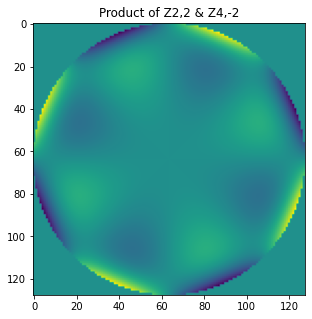

mean value =  0.0


In [13]:
# Calc product of zernikes
zprod = zernike(2,2,128)*zernike(4,-2,128)
plt.figure(figsize=[5,5])
plt.imshow(zprod)
plt.title('Product of Z2,2 & Z4,-2')
plt.show()

# Calculate mean (including zeros), let's just use numpy
print('mean value = ',np.mean(zprod))

## b) Now find the mean of the product of $Z_{3,3} and Z_{3,3}$

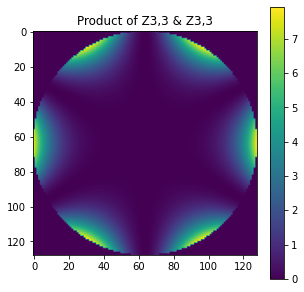

mean value =  0.7912237737883727


In [15]:
# Calc product of zernikes
zprod = zernike(3,3,128)*zernike(3,3,128)
plt.figure(figsize=[5,5])
plt.imshow(zprod)
plt.title('Product of Z3,3 & Z3,3')
plt.colorbar()
plt.show()

# Calculate mean (including zeros), let's just use numpy
print('mean value = ',np.mean(zprod))

## c) What is the common name of the Zernike polynomial in Question b?

$Z_{3,3}$ is called even trefoil (due to the cosine)

## d) Compute a phase screen with kolphaseClass as a 128x128 raster. Set a circular mask over the phase screen matching the Zernike function & Show your results

<ipython-input-5-85b6f2e6bb29>:29: RuntimeWarning: divide by zero encountered in power
  ps=np.power(r,-11/6) #Kolomogorov power spectrum amplitude


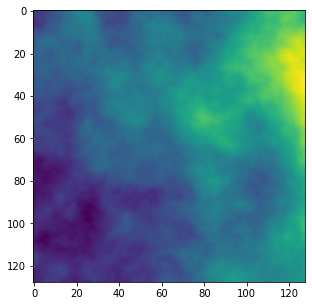

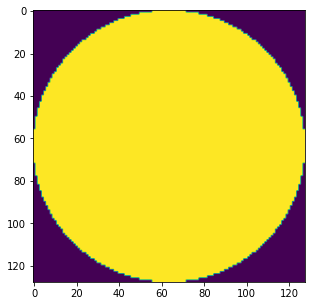

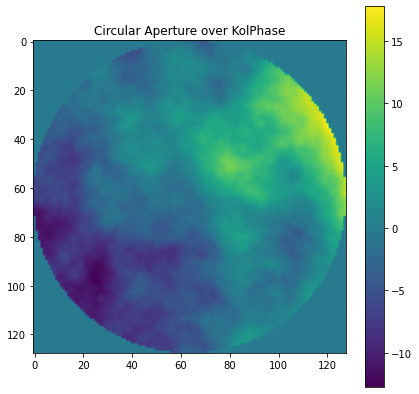

In [22]:
kol = kolphaseClass(128)
plt.figure(figsize=[5,5])
plt.imshow(kol)
plt.show()

zap = zernike(0,0,128)
plt.figure(figsize=[5,5])
plt.imshow(zap)
plt.show()

kolzap = kol*zap
plt.figure(figsize=[7,7])
plt.imshow(kolzap)
plt.title('Circular Aperture over KolPhase')
plt.colorbar()
plt.show()

## e) What is the variance of the phase error of the Kolmogorov phase screen inside this circular area?

$$\sigma^{2} = \frac{1}{N}\Sigma_{n = 0}^{N} [r_{n} - r_{mean}]^{2}$$

In [21]:
N = 128**2 # num points
mean = np.mean(kolzap)
var = np.sum((kolzap-mean)**2) /N
print('variance of phase error = ',var)

variance of phase error =  387.27349271074377


## f) What value of D/r0 does this correspond to?

## g) Show the tip and tilt Zernikes

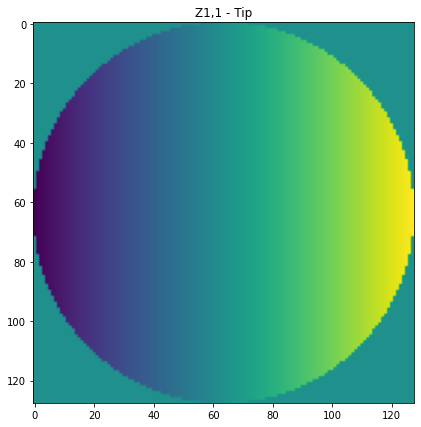

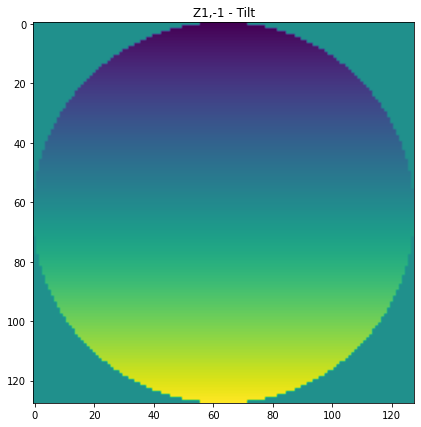

In [23]:
plt.figure(figsize=[7,7])
plt.imshow(zernike(1,1,128))
plt.title('Z1,1 - Tip')
plt.show()

plt.figure(figsize=[7,7])
plt.imshow(zernike(1,-1,128))
plt.title('Z1,-1 - Tilt')
plt.show()

## h) Find the best fit for each terms to the phase screen computed in d) & subtract them from the phase screen. Show the residuals 
hint: the best fit can be found using dot products

## j) How many zernike polynomials do you have to fit and subtract before you reduce the  Phase MSE below 1 radian$^2$

## k) Show a plot of mean WFE as a function of subtracted Zernike terms on a log-log axis

# Problem 4 - WFS Simulation

## a) The telescope you are designing this WFS for has a D/r0 of 8. How many lenslets should the WFS place across the pupil diameter?

$$N_{lenslets} ~= (\frac{D}{r_{o}})^2 = 64$$

## b) How large will each lenslet be in pixels?

I'll take "Large" to be side dimension assuming square lenslets. D/r0 = 8 means 8 lenslets across the beam diameter (for a circular beam inscribed in a square array of lenslets).

$$D_{lens} = \frac{256}{8} = 32 pix$$


## c) Split your pupil into multiple small arrays, each the same size as a lenslet. Compute the PSF of each pupil section. Then recombine back into a full image. Attach an image of the spot array


Note that these spots are imaged onto a single pixel, not a quad cell. To shift this, apply the following phase to your pupil, and keep this as the reference ‘flat’ wave-front. Here, N is the number of subapertures you decided in part a.

	Matlab: >>phase=(pi/4)*N*(zernike(1,1,256)+zernike(1,-1,256));
    
	Python: >>phase=(np.pi/4)*N*(zernike(1,1,256)+zernike(1,-1,256))

## d) Attach an image of the new reference spot array

## e) Use the zernike function to compute a tilt phase.  Apply this tilt to your pupil and image through your lenslet array. Using a centroid calculation, how far did each spot shift?

## f) Scale your applied tilt by 2 and recompute your spot array. How far did each spot move this time?

## g) What is the amplitude of the tilt needed to shift each spot by exactly one pixel 

## h) What is the relationship between the tilt angle of the wave front in part g and the angular subtense of the pixels in your model WFS

In [11]:
print(206265*0.3/42000e3)

0.08839928571428571
